# 数据分析项目课：零售业用户人群分析——基于K means聚类算法

## 1. 导入数据

In [1]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual_Income (k$),Spending_Score,visits_p12,morning_visits_p12,afternoon_visit_p12,evening_visits_p12,morning_spending_score,...,weekend_visits_p12,weekday_spending_score,weekend_spending_score,fiirst_visit_till_today,with_kids_visits_p12,with_couple_visits_p12,clothing_spending_score,food&beverage_spending_score,entertainment_spending_score,kids_spending_score
0,4,Female,23,16,77,44,44,0,0,77,...,0,77,0,269.0,0,0,0,77,0,0
1,2,Male,21,15,81,120,0,120,0,0,...,0,81,0,210.0,0,0,0,81,0,0
2,3,Female,20,16,6,2,0,0,2,0,...,2,0,6,157.0,0,2,0,3,3,0
3,1,Male,19,15,39,10,0,0,10,0,...,0,39,0,634.0,0,8,0,30,9,0
4,61,Male,70,46,56,31,0,0,31,0,...,13,40,16,700.0,0,31,6,50,0,0


## 2. 将文本型数据Gender替换为数值型变量，女性替换为1，男性替换为0

In [2]:
import numpy as np
data.Gender[data['Gender'] == 'Female']=1
data.Gender[data['Gender'] == 'Male']=0
data.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CustomerID,Gender,Age,Annual_Income (k$),Spending_Score,visits_p12,morning_visits_p12,afternoon_visit_p12,evening_visits_p12,morning_spending_score,...,weekend_visits_p12,weekday_spending_score,weekend_spending_score,fiirst_visit_till_today,with_kids_visits_p12,with_couple_visits_p12,clothing_spending_score,food&beverage_spending_score,entertainment_spending_score,kids_spending_score
0,4,1,23,16,77,44,44,0,0,77,...,0,77,0,269.0,0,0,0,77,0,0
1,2,0,21,15,81,120,0,120,0,0,...,0,81,0,210.0,0,0,0,81,0,0
2,3,1,20,16,6,2,0,0,2,0,...,2,0,6,157.0,0,2,0,3,3,0
3,1,0,19,15,39,10,0,0,10,0,...,0,39,0,634.0,0,8,0,30,9,0
4,61,0,70,46,56,31,0,0,31,0,...,13,40,16,700.0,0,31,6,50,0,0


## 3. 选取聚类特征并建立K means聚类器

In [3]:
from sklearn.cluster import KMeans

In [4]:
KMeans(n_clusters=2,max_iter=300)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## 4. 利用性别，年龄，收入，花费进行聚类，尝试解读质心

In [19]:
CustomerGroupKmeans = KMeans(n_clusters=2,max_iter=300).fit(data[['Gender','Age','Annual_Income (k$)','Spending_Score']])
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score'])

,Gender,Age,Annual_Income (k$),Spending_Score
0,0.565217,46.165217,59.365217,32.886957
1,0.552941,28.952941,62.176471,73.623529


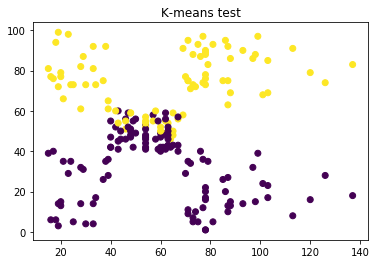

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(data['Annual_Income (k$)'], data['Spending_Score'],c=CustomerGroupKmeans.labels_)
plt.title("K-means test")
plt.show()

In [22]:
CustomerGroupKmeans = KMeans(n_clusters=4,max_iter=300).fit(data[['Gender','Age','Annual_Income (k$)','Spending_Score']])
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score'])

,Gender,Age,Annual_Income (k$),Spending_Score
0,0.621053,44.894737,48.705263,42.631579
1,0.538462,32.692308,86.538462,82.128205
2,0.473684,40.394737,87.000000,18.631579
3,0.500000,24.821429,28.714286,74.250000


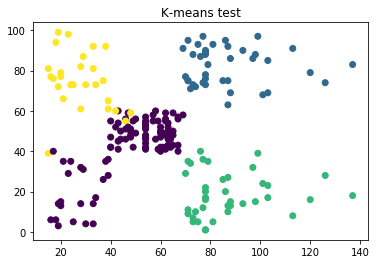

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(data['Annual_Income (k$)'], data['Spending_Score'],c=CustomerGroupKmeans.labels_)
plt.title("K-means test")
plt.show()

In [24]:
CustomerGroupKmeans = KMeans(n_clusters=5,max_iter=300).fit(data[['Gender','Age','Annual_Income (k$)','Spending_Score']])
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score'])

,Gender,Age,Annual_Income (k$),Spending_Score
0,0.472222,40.666667,87.750000,17.583333
1,0.597403,43.727273,55.480519,49.324675
2,0.560000,24.960000,28.040000,77.000000
3,0.538462,32.692308,86.538462,82.128205
4,0.608696,45.217391,26.304348,20.913043


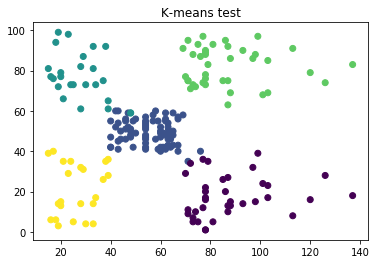

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(data['Annual_Income (k$)'], data['Spending_Score'],c=CustomerGroupKmeans.labels_)
plt.title("K-means test")
plt.show()

## 5. 接下去要加入周中周末的维度，最佳组数可能会变

In [26]:
CustomerGroupKmeans = KMeans(n_clusters=10,max_iter=300).fit(data[['Gender','Age','Annual_Income (k$)','Spending_Score','weekday_visits_p12','weekend_visits_p12','visits_p12','weekday_spending_score','weekend_spending_score']])
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score','weekday_visits_p12','weekend_visits_p12','visits_p12','weekday_spending_score','weekend_spending_score'])

,Gender,Age,Annual_Income (k$),Spending_Score,weekday_visits_p12,weekend_visits_p12,visits_p12,weekday_spending_score,weekend_spending_score
0,0.285714,41.928571,92.214286,16.214286,28.357143,45.071429,73.428571,2.714286,13.500000
1,0.500000,27.192308,37.269231,80.346154,4.346154,6.038462,10.384615,17.115385,63.230769
2,0.677419,39.903226,52.419355,49.419355,7.064516,7.193548,14.258065,11.612903,37.806452
3,0.593750,37.343750,59.656250,46.906250,22.468750,25.125000,47.593750,8.656250,38.250000
4,0.428571,66.000000,57.714286,50.285714,21.857143,78.428571,100.285714,14.571429,35.714286
5,0.590909,36.454545,66.409091,69.000000,31.318182,8.409091,39.727273,43.909091,25.090909
6,0.619048,44.142857,25.142857,19.523810,7.380952,7.523810,14.904762,5.904762,13.619048
7,0.285714,55.428571,59.428571,55.857143,83.428571,17.428571,100.857143,45.714286,10.142857
8,0.526316,40.684211,86.684211,16.210526,10.052632,8.052632,18.105263,6.000000,10.210526
9,0.666667,32.952381,88.666667,81.523810,21.714286,31.571429,53.285714,11.904762,69.619048


In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(data['weekend_visits_p12'], data['weekday_visits_p12'],c=CustomerGroupKmeans.labels_)
plt.title("K-means test")
plt.show()

## 6. 继续加入是否带小孩，陪伴侣，各项花费细分等

In [27]:
CustomerGroupKmeans = KMeans(n_clusters=12,max_iter=300).fit(data[['Gender','Age','Annual_Income (k$)','Spending_Score','weekday_visits_p12','weekend_visits_p12','visits_p12','weekday_spending_score','weekend_spending_score','with_kids_visits_p12','with_couple_visits_p12','clothing_spending_score','food&beverage_spending_score','entertainment_spending_score','kids_spending_score']])
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score','weekday_visits_p12','weekend_visits_p12','visits_p12','weekday_spending_score','weekend_spending_score','with_kids_visits_p12','with_couple_visits_p12','clothing_spending_score','food&beverage_spending_score','entertainment_spending_score','kids_spending_score'])

,Gender,Age,Annual_Income (k$),Spending_Score,weekday_visits_p12,weekend_visits_p12,visits_p12,weekday_spending_score,weekend_spending_score,with_kids_visits_p12,with_couple_visits_p12,clothing_spending_score,food&beverage_spending_score,entertainment_spending_score,kids_spending_score
0,0.666667,32.041667,44.125000,70.291667,8.458333,7.166667,15.625000,19.333333,50.958333,11.583333,1.166667,3.625000,36.875000,11.666667,1.812500e+01
1,0.285714,45.357143,87.142857,18.071429,29.285714,43.714286,73.000000,3.928571,14.142857,42.928571,11.285714,5.571429,6.142857,3.142857,3.214286e+00
2,0.586207,36.379310,60.482759,47.103448,24.241379,23.620690,47.862069,9.413793,37.689655,21.862069,17.620690,26.000000,9.172414,6.724138,5.206897e+00
3,0.428571,60.285714,50.428571,52.428571,77.000000,21.857143,98.857143,41.857143,10.571429,39.142857,29.000000,25.857143,18.571429,4.571429,3.428571e+00
4,0.590909,32.818182,84.909091,81.045455,22.500000,15.045455,37.545455,25.090909,55.954545,13.863636,17.863636,48.409091,15.909091,12.409091,4.318182e+00
5,0.590909,44.318182,25.772727,20.272727,7.181818,8.136364,15.318182,5.681818,14.590909,5.090909,7.727273,6.863636,8.045455,4.454545,9.090909e-01
6,0.500000,54.750000,70.500000,57.875000,15.750000,75.250000,91.000000,10.250000,47.625000,19.625000,50.875000,26.250000,16.375000,1.250000,1.400000e+01
7,0.655172,40.931034,50.931034,51.344828,14.310345,8.034483,22.344828,22.482759,28.862069,6.620690,10.000000,26.482759,16.000000,5.551724,3.310345e+00
8,0.523810,39.523810,85.476190,16.809524,9.714286,8.952381,18.666667,6.285714,10.523810,7.476190,7.761905,5.190476,3.952381,5.714286,1.952381e+00
9,0.500000,34.900000,92.200000,78.700000,39.200000,43.200000,82.400000,19.400000,59.300000,74.300000,2.500000,24.100000,36.000000,7.500000,1.110000e+01


In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(data['weekend_visits_p12'], data['kids_spending_score'],c=CustomerGroupKmeans.labels_)
plt.title("K-means test")
plt.show()

In [28]:
data['Kmeans_result']=CustomerGroupKmeans.labels_

In [29]:
data.to_csv("CustomerGroup_k_means_result.csv")

In [30]:
pd.DataFrame(CustomerGroupKmeans.cluster_centers_,columns=['Gender','Age','Annual_Income (k$)','Spending_Score','weekday_visits_p12','weekend_visits_p12','visits_p12','weekday_spending_score','weekend_spending_score','with_kids_visits_p12','with_couple_visits_p12','clothing_spending_score','food&beverage_spending_score','entertainment_spending_score','kids_spending_score']).to_csv("label_centers.csv")